# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy==0.0.5

     |████████████████████████████████| 563kB 1.5MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559703 sha256=4efa5d3cb28aefa9f3506ef9f23cb2427233b9da1a7c53ee7559a39f8038915d
  Stored in directory: /Users/paulaurteaga/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
import datetime

weather_api_key='9ff8bea7ea32f445b8aa4c45a4ca6fe1'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [161]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [162]:
url = "http://api.openweathermap.org/data/2.5/weather?"
counter=1
set_num=1
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="
print('Beginning data retrieval')
print('-----------------------------')
for city in cities:
    response = requests.get(f'{query_url}{city}&units=metric').json()
    if counter<=50:
        try:
            print(f"Processing record {counter} of set {set_num} |{response['name']}")
            new_cities.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            counter=counter+1
        except (KeyError, IndexError):
            print("City not found. Skipping...")
            
    else:
        counter=1
        set_num=set_num+1
print('-----------------------------')
print('Data Retreival completed')
print('-----------------------------')

Beginning data retrieval
-----------------------------
Processing record 1 of set 1 |Rikitea
Processing record 2 of set 1 |Noumea
Processing record 3 of set 1 |Busselton
Processing record 4 of set 1 |Thompson
Processing record 5 of set 1 |Draguignan
Processing record 6 of set 1 |Mataura
Processing record 7 of set 1 |Hithadhoo
Processing record 8 of set 1 |Flin Flon
Processing record 9 of set 1 |Albany
Processing record 10 of set 1 |Gushikawa
City not found. Skipping...
Processing record 11 of set 1 |Pontes e Lacerda
Processing record 12 of set 1 |Guerrero Negro
Processing record 13 of set 1 |Yashan
Processing record 14 of set 1 |Vlasikha
Processing record 15 of set 1 |Marawi
Processing record 16 of set 1 |College
Processing record 17 of set 1 |Necochea
Processing record 18 of set 1 |Airai
Processing record 19 of set 1 |Punta Arenas
Processing record 20 of set 1 |Vostok
City not found. Skipping...
Processing record 21 of set 1 |Nizhneangarsk
Processing record 22 of set 1 |Hilo
Processin

Processing record 41 of set 4 |Sechenovo
Processing record 42 of set 4 |Vitim
Processing record 43 of set 4 |Lakshettipet
Processing record 44 of set 4 |Urucara
Processing record 45 of set 4 |Ola
City not found. Skipping...
Processing record 46 of set 4 |Pacific Grove
Processing record 47 of set 4 |Mutare
Processing record 48 of set 4 |Siguiri
Processing record 49 of set 4 |Port Alfred
Processing record 50 of set 4 |Kavaratti
Processing record 1 of set 5 |Soledad
Processing record 2 of set 5 |Ancud
Processing record 3 of set 5 |Mossamedes
Processing record 4 of set 5 |Provideniya
Processing record 5 of set 5 |Caravelas
Processing record 6 of set 5 |Opuwo
Processing record 7 of set 5 |Yulara
Processing record 8 of set 5 |Labuhan
City not found. Skipping...
Processing record 9 of set 5 |Ubari
Processing record 10 of set 5 |Arrondissement de Clermont
Processing record 11 of set 5 |Huarmey
City not found. Skipping...
Processing record 12 of set 5 |Turukhansk
City not found. Skipping...
Pro

Processing record 34 of set 8 |Murray Bridge
Processing record 35 of set 8 |Poya
Processing record 36 of set 8 |Grindavik
Processing record 37 of set 8 |Hambantota
Processing record 38 of set 8 |Xapuri
Processing record 39 of set 8 |Flensburg
City not found. Skipping...
City not found. Skipping...
Processing record 40 of set 8 |Kaitangata
City not found. Skipping...
Processing record 41 of set 8 |Tautira
Processing record 42 of set 8 |Half Moon Bay
Processing record 43 of set 8 |Karratha
Processing record 44 of set 8 |Altamont
Processing record 45 of set 8 |Ulaanbaatar
Processing record 46 of set 8 |Naze
Processing record 47 of set 8 |Matagami
Processing record 48 of set 8 |Gamba
Processing record 49 of set 8 |Ostrovnoy
Processing record 50 of set 8 |Aykhal
Processing record 1 of set 9 |Iglesias
Processing record 2 of set 9 |Praia
City not found. Skipping...
Processing record 3 of set 9 |Sirsa
Processing record 4 of set 9 |Nazas
Processing record 5 of set 9 |Kamenka
Processing record 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [163]:
dic={'City':new_cities,'Cloudiness':cloudiness,'Country':country,'Date':date,'Humidity':humidity, 'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind speed':wind_speed}
weather_data=pd.DataFrame(dic)
weather_data.to_csv('../weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,Thompson,20,CA,1579478652,77,55.74,-97.86,-19.00,4.60
1,Churapcha,95,RU,1579478653,98,62.00,132.43,-24.83,1.16
2,Muroto,75,JP,1579478653,86,33.28,134.15,3.00,3.10
3,Biharamulo,99,TZ,1579478653,92,-2.63,31.31,17.24,1.01
4,Mataura,97,NZ,1579478766,95,-46.19,168.86,14.44,2.24


In [164]:
#Going to convert the 10 digit date format to a readable format
weather_data['Date']=pd.to_datetime(weather_data['Date'])
weather_data['Date']=weather_data['Date'].map(lambda x: x.strftime('%Y/%m/%d'))
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,Thompson,20,CA,1970/01/01,77,55.74,-97.86,-19.00,4.60
1,Churapcha,95,RU,1970/01/01,98,62.00,132.43,-24.83,1.16
2,Muroto,75,JP,1970/01/01,86,33.28,134.15,3.00,3.10
3,Biharamulo,99,TZ,1970/01/01,92,-2.63,31.31,17.24,1.01
4,Mataura,97,NZ,1970/01/01,95,-46.19,168.86,14.44,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

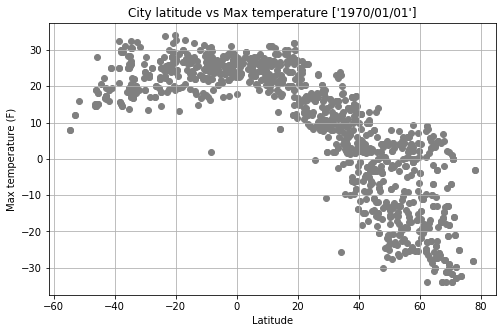

As we can see in this Latitude vs Max temperature analysis on ['1970/01/01'] we conlude that the farder we go from the Equator, latitude 0, temperatures will likely start to drop, no mather if we go up or down


In [165]:
date=weather_data["Date"].unique()
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Max Temp'],color='grey')
plt.title(f'City latitude vs Max temperature {date}')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig('../images/latvsmaxtemp.png')
plt.show()
print(f'As we can see in this Latitude vs Max temperature analysis on {date} we conlude that the farder we go from the Equator, latitude 0, temperatures will likely start to drop, no mather if we go up or down')

#### Latitude vs. Humidity Plot

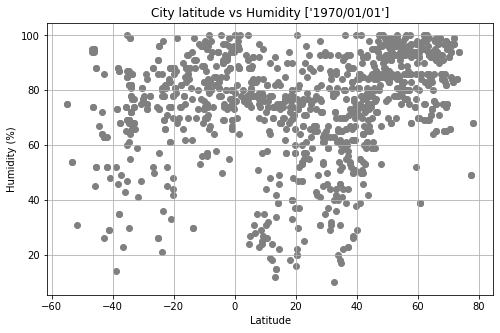

In tnis scatter pot we see there is not a strong correlation between latitude and humidity, since data points seem to be really dispersed


In [166]:
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Humidity'],color='grey')
plt.title(f'City latitude vs Humidity {date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('../images/latvshum.png')
plt.show()
print(f'In tnis scatter pot we see there is not a strong correlation between latitude and humidity, since data points seem to be really dispersed')

#### Latitude vs. Cloudiness Plot

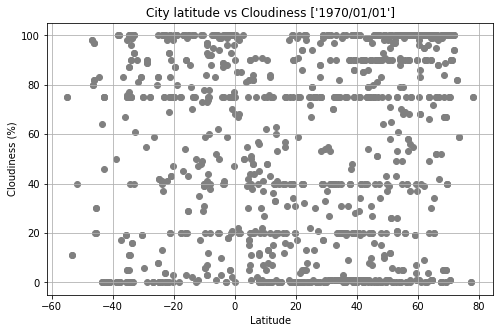

Same as the last plot, humidity data points dont seem concentrated enough on any specific latitude point to aprove a correlation


In [167]:
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'],color='grey')
plt.title(f'City latitude vs Cloudiness {date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('../images/latvscloud.png')
plt.show()
print(f'Same as the last plot, humidity data points dont seem concentrated enough on any specific latitude point to aprove a correlation')

#### Latitude vs. Wind Speed Plot

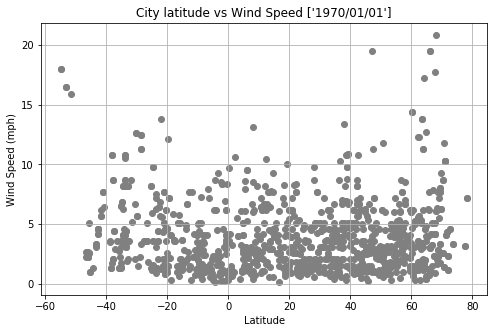

According to this plot, we can say that at some extreme latitude points, such as lower than -60 and higher than 60, winds speed will probably be higher than normal, but other than that latitude doesnt really affect wind speed


In [168]:
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Wind speed'],color='grey')
plt.title(f'City latitude vs Wind Speed {date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('../images/latvswind.png')
plt.show()
print(f'According to this plot, we can say that at some extreme latitude points, such as lower than -60 and higher than 60, winds speed will probably be higher than normal, but other than that latitude doesnt really affect wind speed' )

## Linear Regression

In [169]:
# Create Northern and Southern Hemisphere DataFrames
northern_dataframe=weather_data.loc[weather_data['Lat']>=0]
southern_dataframe=weather_data.loc[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8499746838089459


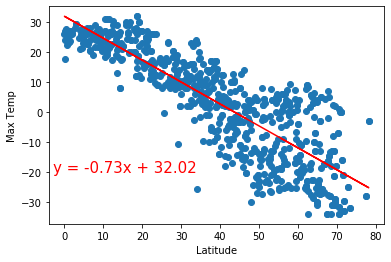

In [170]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,-20))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvsmaxtemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4486440471755992


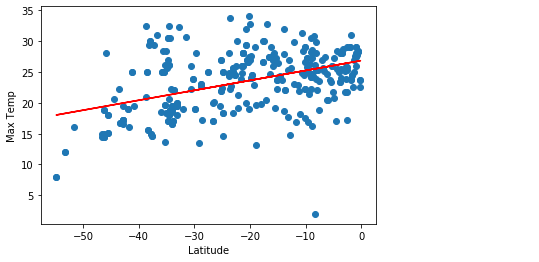

In [171]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvsmaxtemp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37122501393838714


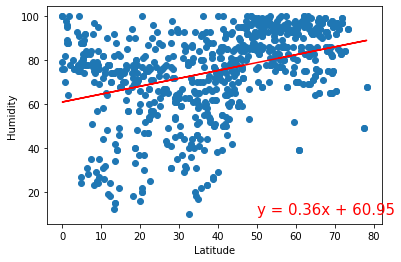

In [172]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(50,10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvshum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31051536591875567


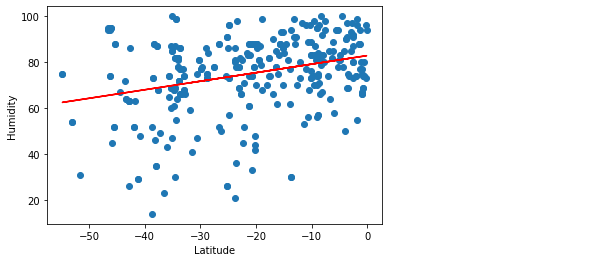

In [173]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(20,10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvshum.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28579934884755687


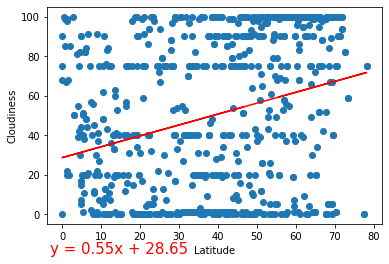

In [174]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,-20))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvscloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1654126385786137


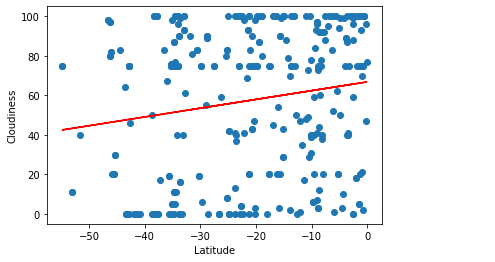

In [175]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvscloud.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11903586299275473


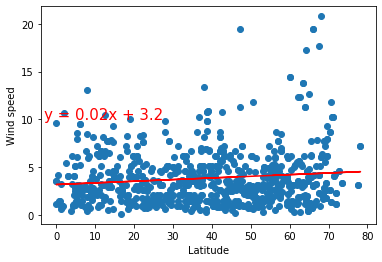

In [176]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,10))
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvswind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3388002667848264


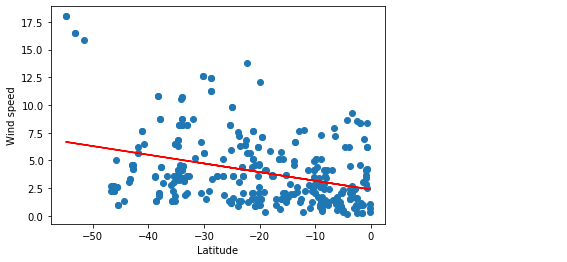

In [177]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(10,0))
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvswind.png')
plt.show()